In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\mitra\Desktop\MAIN\MITRA P\ML\ML TECHNIQUES\MULTICOLLINEARITY\Iris (1).csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(["Id"],axis=1,inplace=True)

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
x=df.iloc[:,0:4]

In [7]:
y=df.iloc[:,-1]

In [8]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
cor=x_train.corr()

<AxesSubplot:>

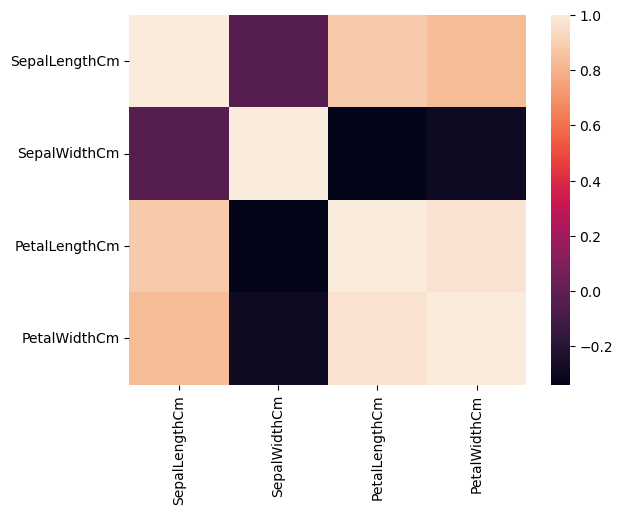

In [12]:
sns.heatmap(cor)

### <font color="blue">SOLVING MULTICOLLINEARITY ISSUE:

In [13]:
def corre(df,threshold):  # Create a function with data, Threshold Value.
    
    corr_cols=set()   # Creat a set,in which unique column names are store
    
    corr_matrix=df.corr()  # All the correlation result store in this variable.
    
    for i in range(len(corr_matrix.columns)):  # Loop is running on the Range of the "corr_matrix's"column
        
        for j in range(i): # Loop is running on the range of "i".
            
            #If two columns are greater than "Threshold value",then give the first columns
            if abs(corr_matrix.iloc[i,j]>threshold):  
                colname=corr_matrix.columns[i]
                
                # Add this column to "corr_cols"
                corr_cols.add(colname) 
                
    return corr_cols   # Returns the "corr_cols" set.
    

In [14]:
corre(x_train,0.7) # Give the dataset & Threshold Value.

{'PetalLengthCm', 'PetalWidthCm'}

In [15]:
corr_feature=corre(x_train,0.7)

In [16]:
x_train.shape

(105, 4)

In [17]:
x_train.drop(labels=corr_feature,axis=1,inplace=True)
x_test.drop(labels=corr_feature,axis=1,inplace=True)